<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importation-et-préparation-des-données" data-toc-modified-id="Importation-et-préparation-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importation et préparation des données</a></span></li><li><span><a href="#Perceptron-multi-couches" data-toc-modified-id="Perceptron-multi-couches-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Perceptron multi-couches</a></span></li><li><span><a href="#Réseau-convolutif" data-toc-modified-id="Réseau-convolutif-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Réseau convolutif</a></span></li></ul></div>

# TP n°4 : réseaux neuronaux

<br>

L'objectif de cette séance est d'utiliser l'interface de programmation Keras afin de construire un modèle prédictif pour les données MNIST. Dans un premier temps vous allez construire et entraîner un réseau neuronal multicouche totalement connecté puis, dans un second temps, vous mettrez en oeuvre un réseau convolutif.

<br>

**Exercice**

- Que représentent les données ?
Image 28*28 = 784 pixels en niveau de gris qui représentent une classification à 10 classes (0 à 9).
- S'agit-il d'un problème de classification ou de régression ?
- S'il s'agit d'un problème de classification, combien de classes y a t-il ?

<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras

C:\Users\lucas\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<br>

## Importation et préparation des données

<br>

Les données MNIST peuvent être importée directement depuis Keras à l'aide de la méthode <code>load_data()</code> du module <code>keras.datasets.mnist</code>.

<br>

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 376s 33us/step


In [17]:
print(X_train.shape)
print(X_test.shape)

print(X_train.min())
print(X_train.max())

print(X_train)
print(y_train)

(60000, 28, 28)
(10000, 28, 28)
0
255
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]


<br>

**Exercice**

- Combien y a t-il de données dans le jeu d'entraînement et dans le jeu de test ?
60000 entrainement et 10000 de test.
- Sous quelle forme se présentent les données ?
Matrices 28 par 28
- Quelles sont les valeurs min et max de X_train ?
0 et 255 (couleur pixel gris)
- Comment sont codés les labels des données ?
Suite d'entier qui représentent les résultats attendu (les classes).
<br>


Quelles informations peut-on tirer du résultat renvoyé par la cellule ci-dessous ?
Les données ne sont pas triés (indice moyen = N/2 et tout autour de cette moyenne).

In [16]:
print("label   nombre de données   indice moyen   écart type des indices")

for i in range(10):
    index = np.where(y_train==i)[0]
    print("{:5d}   {:10d}   {:15.1f}   {:15.1f}".format(i, len(index), np.mean(index), np.std(index)))

label   nombre de données   indice moyen   écart type des indices
    0         5923           30020.3           17364.4
    1         6742           29670.2           17170.8
    2         5958           30211.2           17295.3
    3         6131           29950.4           17389.3
    4         5842           29951.0           17424.4
    5         5421           30193.4           17245.6
    6         5918           29861.8           17283.2
    7         6265           30124.9           17522.3
    8         5851           30328.3           17281.0
    9         5949           29743.1           17215.4


<br>

### Préparation des matrices d'entrée

<br>

Vous allez commencer par implémenter un perceptron multi-couche. Ce type de réseau prend comme donnée d'entrée une matrice de forme $N \times d$ où $N$ est le nombre de données et $d$ est la dimension de chaque donnée qui est ici égale au nombre de pixels des images. 

Par ailleurs, les stratégies habituelles d'initialisation des poids dans les réseaux neuronaux nécessitent pour être efficaces que chaque descripteur des données d'entrées se comporte approximativement comme une variable aléatoire de moyenne nulle et de variance unitaire. Pour effectuer une telle transformation, on peut utiliser la fonction <code>StandardScaler()</code> de scikit-learn. Dans certains cas (lorsque les données d'entrée sont des images par exemple) il peut être plus naturel de se restreindre à un intervalle de valeurs positives. Dans ce cas, on transformera les données de façon à ce que chaque descripteur ait une valeur comprise entre 0 et 1.


**Exercice**

- Mettre X_train et X_test sous la forme de matrices $N \times d$ où $d = 28\times 28$ = 784.
- Faire un changement d'échelle de façon à ce que toutes les données soient comprises dans l'intervalle $[0,1]$.
- A l'aide de la fonction <code>astype()</code>, convertir les données au format float32 (nombre à virgule flottante codé sur 32 bits) qui est le format utilisé par défaut par tensorflow.

<br>


In [55]:
N_train = 60000
N_test = 10000

print(X_train.shape)
X_train_shaped = np.reshape(X_train,(60000, 784))
X_train_scaled = X_train_shaped.astype("float32", copy = True)
X_train_final = X_train_scaled/255
print(X_train_final[0])

X_test_shaped = np.reshape(X_test,(10000, 784))
X_test_scaled = X_test_shaped.astype("float32", copy = True)
X_test_final = X_test_scaled/255

(60000, 28, 28)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

### Préparation des vecteurs d'étiquettes

<br>

Lorsqu'on charge le dataset, les étiquettes sont codées sous la forme d'un nombre entier compris entre 0 et 9. Cette façon de représenter les différentes classes présente un inconvénient: puisque les labels (1, 2, ..., 9) ont une relation d'ordre (1 < 2 < ... < 9) cette représentation tend implicitement à considérer que les classes elles-mêmes sont ordonnées (classe 1 < classe 2 < ... < classe 9). Cette forme de représentation est parfaitement adaptée à certains problèmes, par exemple si les classes sont *très froid*, *froid*, *tiède*, *chaud*, *très chaud*. En revanche, lorsque les classes ne présentent aucune relation d'ordre, il est préférable d'éviter ce type de représentation. On va alors utiliser un encodage de type *one-hot* consistant à créer une étiquette de dimension $K$ s'il y a $K$ classes. Pour une donnée appartenant à la classe $m$, toutes les composantes seront nulles sauf la composante $m$ qui aura la valeur 1.

**Exercice**

- En utilisant la fonction <code>keras.utils.to_categorical()</code>, créez deux variables de sortie *y_train_onehot* et *y_test_onehot* encodant les étiquettes des données d'entraînement et de test de cette façon.
- Affichez à l'écran les 10 premières composantes de *y_train* et de *y_train_one_hot*.

<br>

In [35]:
y_train_onehot = keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train_onehot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<br>

## Perceptron multi-couches

<br>

**Exercice**

- Pour ce problème, combien d'unités la couche de sortie doit-elle comporter ? Quelle fonction d'activation cette couche doit-elle utiliser ?
Couche de sortie doit comporter 10 couches. Elle doit utiliser la fonction d'activation softmax.
- Construire un réseau neuronal comportant 2 couches cachées de 100 unités avec une activation de type *relu* et 1 couche de sortie.
- Combien de paramètres votre modèle va t-il devoir ajuster ?
- Compiler le modèle en choisissant la fonction de coût 'categorical_crossentropy', l'algorithme de descente SGD et la métrique d'évaluation 'accuracy'.
- Entraîner le modèle avec des valeurs de paramètres *batch_size*, *epochs* et *validation_split* égales respectivement à 32, 10 et 0,2. Quels sont les rôles de ces paramètres ?

<br>

In [115]:
# Création du modèle
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

cb_sauvegarde = ModelCheckpoint(filepath='mnist_1.h5', save_best_only=True)
cb_earlystopping = EarlyStopping(monitor="val_accuracy", patience=5)

model = Sequential()

model.add(Dense(units=100, activation='relu', input_shape=(784,)))
model.add(Dense(units=100, activation='relu', input_shape=(100,)))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 100)               78500     
                                                                 
 dense_45 (Dense)            (None, 100)               10100     
                                                                 
 dense_46 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# Compilation du modèle
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])

In [47]:
# Entraînement du modèle
history = model.fit(X_train_final, y_train_onehot, epochs=10, batch_size=32, validation_split=0.2, callbacks=[cb_sauvegarde, cb_earlystopping])
history

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3195 - accuracy: 0.9060 - val_loss: 0.1574 - val_accuracy: 0.9540
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1349 - accuracy: 0.9598 - val_loss: 0.1300 - val_accuracy: 0.9609
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0957 - accuracy: 0.9714 - val_loss: 0.1117 - val_accuracy: 0.9666
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0730 - accuracy: 0.9783 - val_loss: 0.0994 - val_accuracy: 0.9712
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0577 - accuracy: 0.9824 - val_loss: 0.0978 - val_accuracy: 0.9729
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0477 - accuracy: 0.9853 - val_loss: 0.0871 - val_accuracy: 0.9754
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0960 - val_accuracy:

<br>

La méthode <code>fit()</code> renvoie comme résultat un objet de la classe <code>History</code> dont l'attribut History.history est un dictionnaire contenant les valeurs de la fonction de coût et de la métrique d'évaluation pour chaque époque:
- History.history['loss'] : valeurs de la fonction de coût pour les données d'entraînement
- History.history['accuracy'] : valeurs de la métrique d'évaluation pour les données d'entraînement
- History.history['val_loss'] : valeurs de la fonction de coût pour les données de validatin
- History.history['val_accuracy'] : valeurs de la métrique d'évaluation pour les données de validation

<br>

**Exercice**

Représenter sur un graphe l'évolution de la fonction de coût et de la métrique d'évaluation, pour les données d'entraînement et de validation au cours de l'entraînement du réseau.

<br>

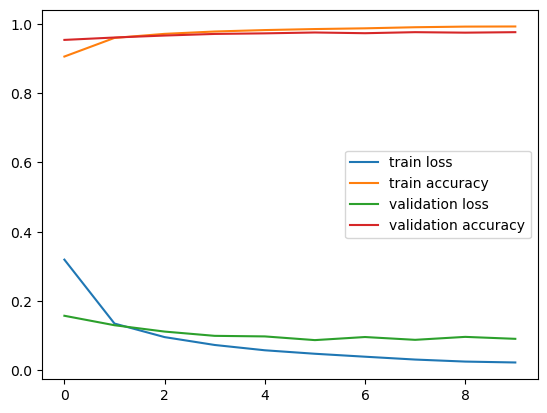

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_loss'], label='validation loss')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

<br>

**Exercice**

- Optimiser les hyper-paramètres du modèle (taux d'apprentissag, nombre d'époques d'entraînement, choix de l'optimiseur, architecture du réseau, etc).
- Déterminer la performance prédictive que l'on peut attendre du modèle pour de nouvelles données.

<br>

<br>

## Réseau convolutif

<br>

Pour obtenir de bons résultats avec des réseaux neuronaux, il est généralement nécessaire de les structurer. Les réseaux totalement connectés possèdent un très grand nombre de paramètres indépendants et nécessitent d'énormes quantités de données d'entraînement pour pouvoir produire des modèles performants. Les réseaux convolutifs permettent d'obtenir d'excellents résultats pour une grande variété de problèmes, en particulier dans le domaine de l'analyse d'images.

<br>

Pour construire un réseau neuronal convolutif capable de traiter des images, on va utiliser des structures <code>keras.layers.Conv2D()</code> et <code>keras.layers.MaxPooling2D()</code>. Ces couches permettent de traiter des données 2D multi-canaux. Dans le cas des données MNIST, il n'y a qu'un seul canal car les images ont été enregistrées en échelle de gris. Dans le cas d'images en couleur, il y aurait 3 canaux (rouge, vert, bleu). Les données que l'on fournit en entrée au réseau doivent être représentées sous la forme d'un tableau à 4 dimensions:
- dimension 1: numéro de la donnée
- dimention 2: indice de la ligne
- dimension 3: indice de la colonne
- dimension 4: numéro de canal

Keras permet en fait de mettre le numéro de canal comme première ou dernière dimension. Pour voir comment est configuré Keras on peut utiliser la commande suivante

<br>


In [61]:
keras.backend.image_data_format()

'channels_last'

<br>

**Exercice**

Mettre les données $X$ d'entraînement et de test sous la forme de tableaux de dimension (data_num, row_num, col_num, 1).

<br>

In [62]:
X_train_final2 = np.reshape(X_train_final, (60000, 28, 28, 1))
X_train_final2.shape

(60000, 28, 28, 1)

<br>

**Exercice**

Construire un réseau convolutif ayant la structure suivante:
- 1 couche de convolution avec 10 filtres de taille $5 \times 5$ et une activation 'relu'
- 1 couche de pooling renvoyant la valeur maximale des entrées sur un zone 2$\times$2 
- 1 couche de convolution avec 20 filtres de taille $5 \times 5$ et une activation 'relu'
- 1 couche de pooling renvoyant la valeur maximale des entrées sur un zone 2$\times$2 
- 1 couche de type <code>keras.layers.Flatten()</code>; que fait cette couche ?
- 1 couche <code>keras.layers.Dense()</code> avec une activation 'relu' et un nombre d'unités égal au nombre de sorties de la couche précédente
- 1 couche de sortie

<br>


In [131]:
#Création du modèle

cb_sauvegarde = ModelCheckpoint(filepath='mnist_1.h5', save_best_only=True)
cb_earlystopping = EarlyStopping(monitor="val_accuracy", patience=5)

model = Sequential()

model.add(keras.layers.Conv2D(filters=10, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Conv2D(filters=20, kernel_size=(5,5), activation='relu'))
model.add(keras.layers.Flatten()) # Aplatit les données : 28*28*1 -> 784
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 12, 12, 10)        0         
 ng2D)                                                           
                                                                 
 dense_93 (Dense)            (None, 12, 12, 256)       2816      
                                                                 
 dense_94 (Dense)            (None, 12, 12, 512)       131584    
                                                                 
 conv2d_74 (Conv2D)          (None, 10, 10, 10)        46090     
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 5, 5, 10)          0         
 ng2D)                                               

<br>

**Exercice**

Compiler et entraîner le modèle avec les paramètres suivants:
- fonction de coût: categorical_crossentropy
- algorithme d'optimisation: Adam
- métrique d'évaluation: accuracy
- taille des mini-lots: 64
- nombre d'époques: 10
- données utilisées pour la validation: 20%

<br>

In [132]:
# Compilation du modèle
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [133]:
# Entraînement du modèle
history = model.fit(X_train_final2, y_train_onehot, epochs=10, batch_size=64, validation_split=0.2, callbacks=[cb_sauvegarde, cb_earlystopping])

Epoch 1/10
750/750 [==============================] - 78s 101ms/step - loss: 0.7403 - accuracy: 0.7607 - val_loss: 0.2026 - val_accuracy: 0.9438
Epoch 2/10
750/750 [==============================] - 75s 100ms/step - loss: 0.3944 - accuracy: 0.8813 - val_loss: 0.1597 - val_accuracy: 0.9561
Epoch 3/10
750/750 [==============================] - 75s 100ms/step - loss: 0.2631 - accuracy: 0.9224 - val_loss: 0.2350 - val_accuracy: 0.9417
Epoch 4/10
750/750 [==============================] - 74s 99ms/step - loss: 0.1884 - accuracy: 0.9464 - val_loss: 0.1337 - val_accuracy: 0.9645
Epoch 5/10
750/750 [==============================] - 75s 101ms/step - loss: 0.1672 - accuracy: 0.9518 - val_loss: 0.1675 - val_accuracy: 0.9597
Epoch 6/10
750/750 [==============================] - 75s 100ms/step - loss: 0.1573 - accuracy: 0.9538 - val_loss: 0.1853 - val_accuracy: 0.9500
Epoch 7/10
 68/750 [=>............................] - ETA: 1:04 - loss: 0.1487 - accuracy: 0.9593

KeyboardInterrupt: 

<br>

**Exercice**

Représenter sur un graphe l'évolution de la fonciton de coût et du score du modèle au cours de l'entraînement.

<br>

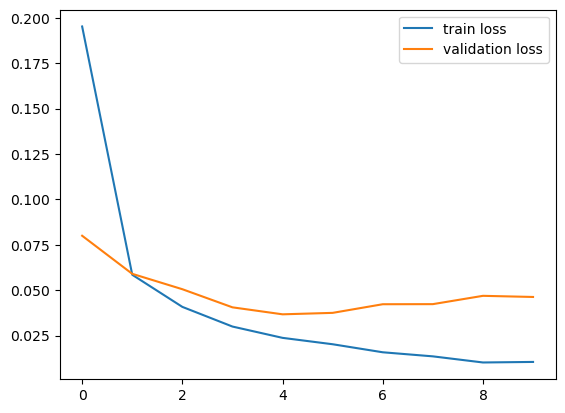

In [103]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

<br>

**Exercice**

Optimiser le modèle (en particulier le taux d'apprentissage) puis calculer la performance prédictive que l'on peut en attendre.

<br>

<br>

## Compléments

<br>

- Etudiez comment varie la vitesse de convergence de l'algorithme en fonction de la taille des mini-lots utilisés. 

- A l'aide de la documentation de keras, vous pouvez ajouter dans votre réseau des couches de *dropout* ou des couches de renormalisation par lot (*batch normalization*) afin d'étudier comment ces couches supplémentaires peuvent affecter l'entraînement du réseau et ses performances.

<br>
